In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:

# Check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detected: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs detected.")


GPUs detected: ['/physical_device:GPU:0']


In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Importing the train dataset along with preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


In [6]:
!nvidia-smi

Sat Jan  4 20:05:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P0             13W /   58W |     165MiB /   4096MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


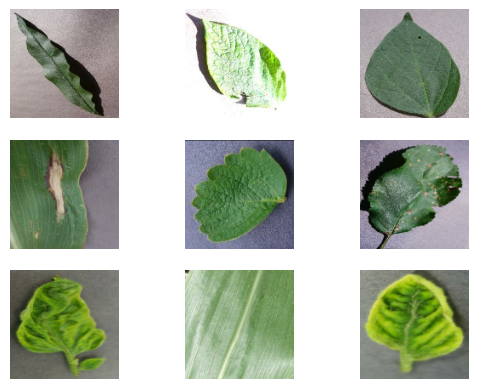

In [8]:
for x, y in training_set.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
for x, y in training_set.take(1):
    print(x.shape)
    print(y.shape)
    break 

(32, 128, 128, 3)
(32, 38)


In [10]:
print(y)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32)


In [11]:
print(y[0])

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(38,), dtype=float32)


##### Here as one may see that the shape of one element of y is 38 and only one value of the 38 values if 1 and rest are 0 this shows the true label of that particular data as there are 38 labels in the datset

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
)

In [14]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [15]:
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [16]:
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [17]:
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [18]:
from tensorflow import keras

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu'))

In [22]:
model.add(Dropout(0.4))

In [23]:
model.add(Dense(units=38, activation='softmax'))

In [24]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#model.summary()

In [26]:
#history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

#### At the end of 10 epochs we got loss: 0.2089 - accuracy: 0.9569 - val_loss: 2.3099 - val_accuracy: 0.6861 which isn't good for our model as it is overfitting on train but performing badly on our validation set

In [27]:
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [29]:
history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 226s 97ms/step - loss: 1.4212 - accuracy: 0.5820 - val_loss: 0.5115 - val_accuracy: 0.8393
Epoch 2/10
2197/2197 [==============================] - 205s 93ms/step - loss: 0.4680 - accuracy: 0.8512 - val_loss: 0.3597 - val_accuracy: 0.8844
Epoch 3/10
2197/2197 [==============================] - 206s 94ms/step - loss: 0.2783 - accuracy: 0.9094 - val_loss: 0.2370 - val_accuracy: 0.9250
Epoch 4/10
2197/2197 [==============================] - 211s 96ms/step - loss: 0.1918 - accuracy: 0.9367 - val_loss: 0.1922 - val_accuracy: 0.9376
Epoch 5/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.1414 - accuracy: 0.9528 - val_loss: 0.1370 - val_accuracy: 0.9574
Epoch 6/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.1112 - accuracy: 0.9635 - val_loss: 0.1648 - val_accuracy: 0.9480
Epoch 7/10
2197/2197 [==============================] - 213s 97ms/step - loss: 0.0909 - accuracy: 0.9695 - val_loss: 0

In [30]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 90s 41ms/step - loss: 0.0413 - accuracy: 0.9865


In [31]:
print(f"Train accuracy: {train_acc}, Train loss: {train_loss}")

Train accuracy: 0.9865424036979675, Train loss: 0.04127274453639984


In [32]:
valid_loss, valid_acc = model.evaluate(validation_set)

550/550 [==============================] - 17s 30ms/step - loss: 0.1539 - accuracy: 0.9567


In [33]:
print(f"Validation accuracy: {valid_acc}, Train loss: {valid_loss}")

Validation accuracy: 0.9567493796348572, Train loss: 0.1538914293050766


### Saving the Model

In [34]:
model.save('trained_model.h5')

#### One may use either way to save their model

In [35]:
model.save('trained_model.keras')

In [36]:
import json
with open('history.json', 'w') as f:
    json.dump(history.history, f)

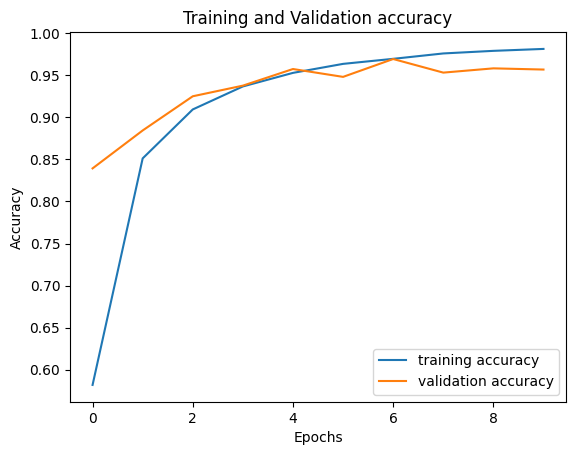

In [37]:
epochs = [i for i in range(10)]
plt.plot(epochs, history.history['accuracy'], label='training accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred = model.predict(test_set)

550/550 [==============================] - 20s 35ms/step


In [41]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [42]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
actual_categories = np.concatenate([y for x, y in test_set], axis=0)

In [44]:
Y_true = np.argmax(actual_categories, axis=1)
Y_true

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)

In [45]:
# pip install scikit-learn

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
classification_report(Y_true, predicted_categories, target_names=class_names)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.99      0.92      0.95       504\n                                 Apple___Black_rot       0.97      0.98      0.97       497\n                          Apple___Cedar_apple_rust       0.99      0.94      0.97       440\n                                   Apple___healthy       0.95      0.97      0.96       502\n                               Blueberry___healthy       0.96      0.99      0.98       454\n          Cherry_(including_sour)___Powdery_mildew       0.93      1.00      0.96       421\n                 Cherry_(including_sour)___healthy       1.00      0.91      0.95       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.87      0.90       410\n                       Corn_(maize)___Common_rust_       1.00      0.95      0.97       477\n               Corn_(maize)___Northern_Leaf_Blight       0.89      

In [48]:
print(classification_report(Y_true, predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.97       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.93      1.00      0.96       421
                 Cherry_(including_sour)___healthy       1.00      0.91      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.87      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.95      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.99      0.

In [49]:
confusion_mat = confusion_matrix(Y_true, predicted_categories)

In [50]:
confusion_mat

array([[463,   8,   0, ...,   0,   1,   0],
       [  0, 486,   0, ...,   0,   0,   0],
       [  0,   0, 414, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 476,   1,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 469]], dtype=int64)

Text(470.58159722222223, 0.5, 'Actual')

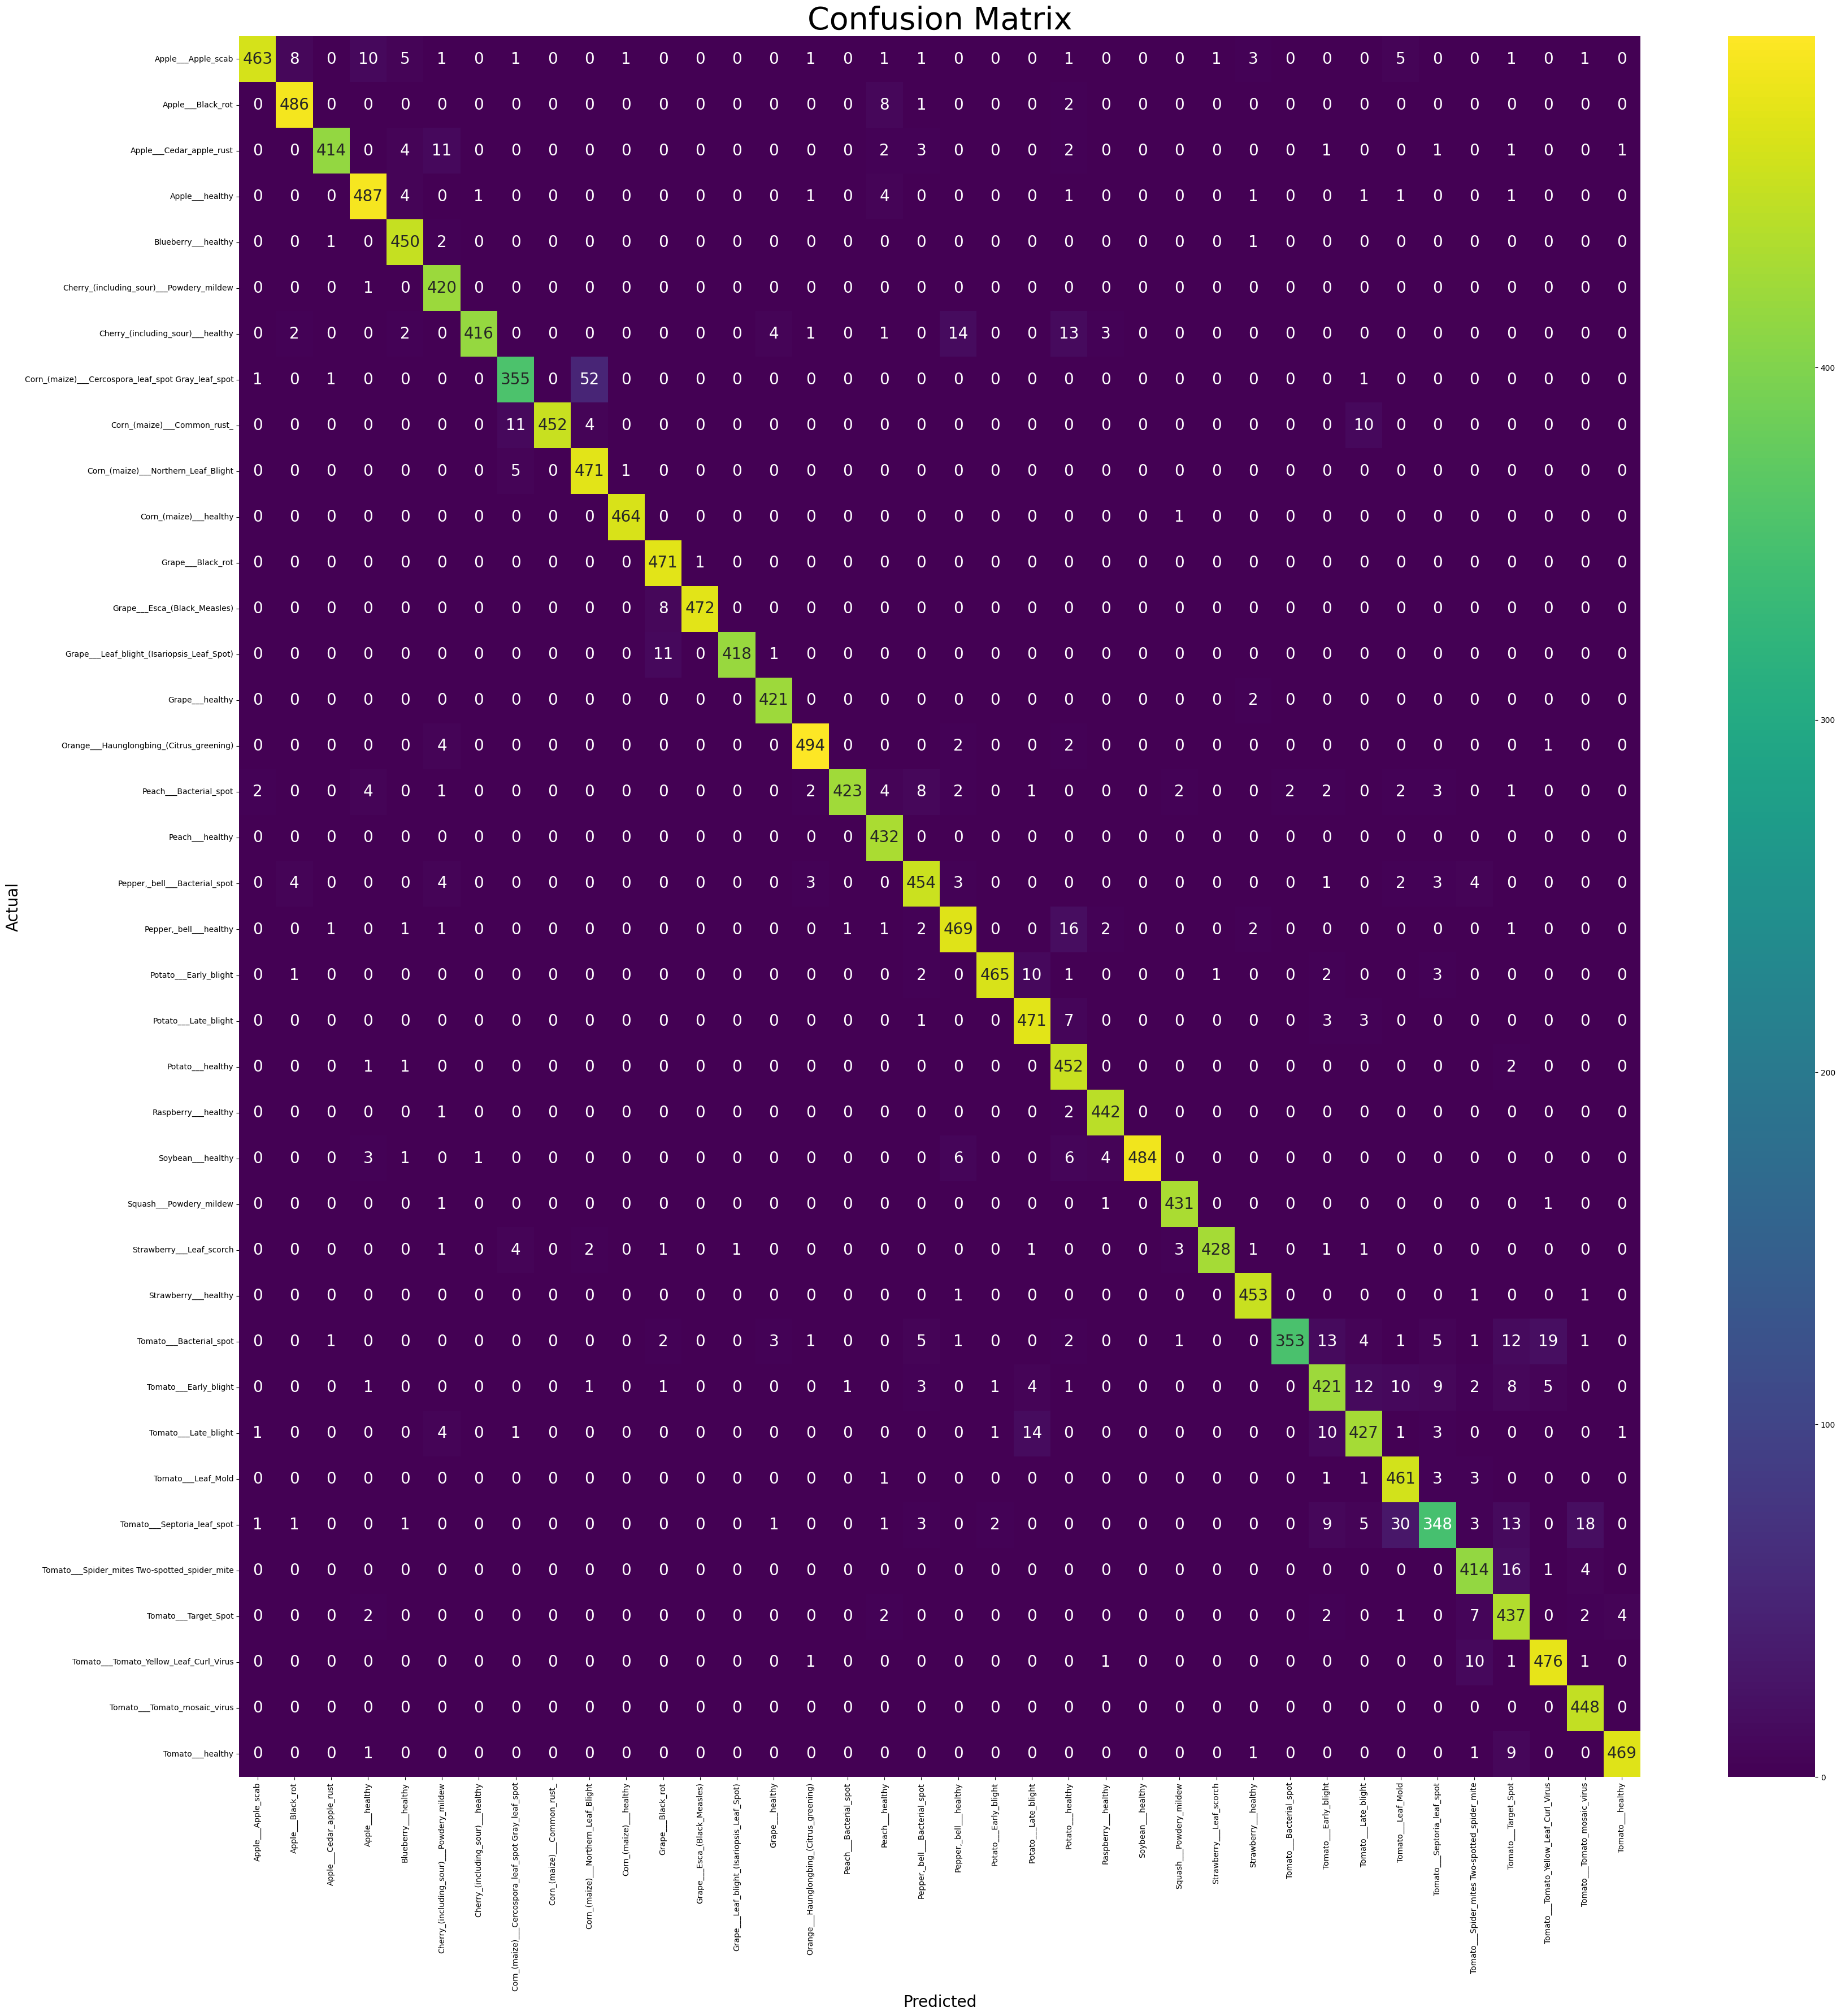

In [51]:
plt.figure(figsize=(40, 40))
plt.title('Confusion Matrix', fontsize=40)
sns.heatmap(confusion_mat, annot=True,annot_kws={'size':20}, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)